Step 1/2:

Reads the information into a dataset then turns it into a pandas dataframe and drops NaN values

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sca = StandardScaler()
enc = LabelEncoder()
oenc = OneHotEncoder()

In [2]:
dataset= sklearn.datasets.fetch_openml(data_id=31)

In [3]:
dataset

{'data':     checking_status  duration                  credit_history  \
 0                <0       6.0  critical/other existing credit   
 1          0<=X<200      48.0                   existing paid   
 2       no checking      12.0  critical/other existing credit   
 3                <0      42.0                   existing paid   
 4                <0      24.0              delayed previously   
 ..              ...       ...                             ...   
 995     no checking      12.0                   existing paid   
 996              <0      30.0                   existing paid   
 997     no checking      12.0                   existing paid   
 998              <0      45.0                   existing paid   
 999        0<=X<200      45.0  critical/other existing credit   
 
                  purpose  credit_amount    savings_status  employment  \
 0               radio/tv         1169.0  no known savings         >=7   
 1               radio/tv         5951.0          

In [4]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0)
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


Step 3:

I know I did it the painful method, but drops the columns I didn't want and uses df.corr() to find out what I would like to predict, in this case it was their job

In [5]:
df = df.drop(df.iloc[:, 0:3], axis=1)
df = df.drop(df.iloc[:, 2:7], axis=1)
df = df.drop(df.iloc[:, 5:8], axis=1)
df = df.drop(df.iloc[:, 7:9], axis=1)
df

,purpose,credit_amount,residence_since,property_magnitude,age,job,num_dependents
0,radio/tv,1169.0,4.0,real estate,67.0,skilled,1.0
1,radio/tv,5951.0,2.0,real estate,22.0,skilled,1.0
2,education,2096.0,3.0,real estate,49.0,unskilled resident,2.0
3,furniture/equipment,7882.0,4.0,life insurance,45.0,skilled,2.0
4,new car,4870.0,4.0,no known property,53.0,skilled,2.0
...,...,...,...,...,...,...,...
995,furniture/equipment,1736.0,4.0,real estate,31.0,unskilled resident,1.0
996,used car,3857.0,4.0,life insurance,40.0,high qualif/self emp/mgmt,1.0
997,radio/tv,804.0,4.0,car,38.0,skilled,1.0
998,radio/tv,1845.0,4.0,no known property,23.0,skilled,1.0


Step 4:

Scales the features credit_amount and age to make it easier and then encodes the ones that arent numbers already

In [6]:
scal_feat = df.copy()
col_names = ['credit_amount', 'age']
feat = scal_feat[col_names]
scaler = StandardScaler().fit(feat.values)
feat = scaler.transform(feat.values)
scal_feat[col_names] = feat
dfscal = scal_feat
dfscal

,purpose,credit_amount,residence_since,property_magnitude,age,job,num_dependents
0,radio/tv,-0.745131,4.0,real estate,2.766456,skilled,1.0
1,radio/tv,0.949817,2.0,real estate,-1.191404,skilled,1.0
2,education,-0.416562,3.0,real estate,1.183312,unskilled resident,2.0
3,furniture/equipment,1.634247,4.0,life insurance,0.831502,skilled,2.0
4,new car,0.566664,4.0,no known property,1.535122,skilled,2.0
...,...,...,...,...,...,...,...
995,furniture/equipment,-0.544162,4.0,real estate,-0.399832,unskilled resident,1.0
996,used car,0.207612,4.0,life insurance,0.391740,high qualif/self emp/mgmt,1.0
997,radio/tv,-0.874503,4.0,car,0.215835,skilled,1.0
998,radio/tv,-0.505528,4.0,no known property,-1.103451,skilled,1.0


In [7]:
dfscal['purpose']= enc.fit_transform(df.purpose.values)
dfscal['property_magnitude']= enc.fit_transform(df.property_magnitude.values)
dfscal['job']= enc.fit_transform(df.job.values)

In [8]:
dfscal

,purpose,credit_amount,residence_since,property_magnitude,age,job,num_dependents
0,6,-0.745131,4.0,3,2.766456,1,1.0
1,6,0.949817,2.0,3,-1.191404,1,1.0
2,2,-0.416562,3.0,3,1.183312,3,2.0
3,3,1.634247,4.0,1,0.831502,1,2.0
4,4,0.566664,4.0,2,1.535122,1,2.0
...,...,...,...,...,...,...,...
995,3,-0.544162,4.0,3,-0.399832,3,1.0
996,9,0.207612,4.0,1,0.391740,0,1.0
997,6,-0.874503,4.0,0,0.215835,1,1.0
998,6,-0.505528,4.0,2,-1.103451,1,1.0


In [15]:
dfscal.corr()

,purpose,credit_amount,residence_since,property_magnitude,age,job,num_dependents
purpose,1.000000,0.052295,0.062940,-0.025888,0.033211,-0.072347,0.025098
credit_amount,0.052295,1.000000,0.028926,-0.139859,0.032716,-0.261139,0.017142
residence_since,0.062940,0.028926,1.000000,0.008860,0.266419,0.000450,0.042643
property_magnitude,-0.025888,-0.139859,0.008860,1.000000,0.125947,0.211556,0.066592
age,0.033211,0.032716,0.266419,0.125947,1.000000,-0.001637,0.118201
job,-0.072347,-0.261139,0.000450,0.211556,-0.001637,1.000000,0.127146
num_dependents,0.025098,0.017142,0.042643,0.066592,0.118201,0.127146,1.000000


In [17]:
X = dfscal[['purpose',"credit_amount","residence_since","property_magnitude","age","num_dependents"]]
y = dfscal.iloc[:, 5]

Step 5:

Splits the data into the sets requested

In [19]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
from sklearn.model_selection import train_test_split
# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

     purpose  credit_amount  residence_since  property_magnitude       age  \
161        4      -0.785538              1.0                   1 -0.487784   
803        6      -0.813539              4.0                   0 -0.048022   
49         6      -0.424715              2.0                   3 -0.663689   
774        4      -0.634900              4.0                   2  2.678504   
296        9       0.497547              4.0                   0 -1.367309   
..       ...            ...              ...                 ...       ...   
259        6      -0.750448              4.0                   3  1.886932   
995        3      -0.544162              4.0                   3 -0.399832   
546        4      -0.442791              4.0                   0  0.127883   
363        3      -0.533529              2.0                   1 -1.279356   
407        6      -0.786247              2.0                   3 -0.751642   

     num_dependents  
161             1.0  
803             1.0

Step 6.1:

Finds best K value using the validation information and proceeds to train and test

In [31]:
from sklearn.neighbors import KNeighborsClassifier
scores = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score_i = knn.score(x_val,y_val)
    scores.append(score_i)

Text(0, 0.5, 'Accuracy')

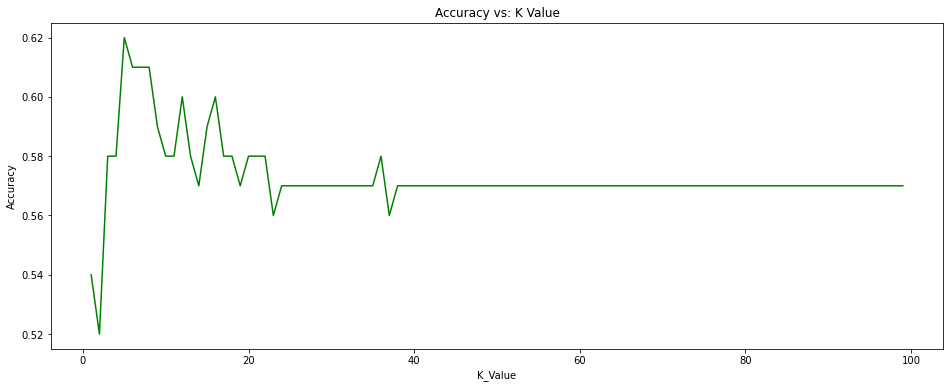

In [32]:
plt.figure(figsize =(16,6))
plt.plot(range(1,100),scores,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [33]:
bestk=max(scores)
best_knn = scores.index(bestk)+1
print(best_knn)

5


In [34]:
# Choose value of K 
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train) 
y_pred = model.predict(x_test)


Step 6.2:

Prints the score and the confusion/classification matrix

In [36]:
score = model.score(x_test,y_test) #Gets the accuracy of our end result using .score
print(score)

0.54


In [37]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  8  0  0]
 [ 4 49  0  5]
 [ 0  3  0  0]
 [ 0 26  0  1]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        12
           1       0.57      0.84      0.68        58
           2       0.00      0.00      0.00         3
           3       0.17      0.04      0.06        27

    accuracy                           0.54       100
   macro avg       0.31      0.30      0.29       100
weighted avg       0.44      0.54      0.46       100



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Step 7:

Uses SVC as an optional challenge

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import confusion_matrix
    
classifier = SVC(kernel='linear',C=1,gamma='auto')
Smodel = classifier.fit(X_train, y_train)
_pred = classifier.predict(X_test)
score = model.score(X_test,y_test)